# 1. Define Business Requirement

## Problem Statement
Title: Stock Price Prediction Based on Macroeconomic Factors

## Challenge:
How does changes in macroeconomic factors, like interest rates and inflation, affect the stock market development, and how can we predict these changes using historical data?

## Importance:
Macroeconomic changes have a direct impact on companies' borrowing costs and earnings, which in turn affect their stock prices. Being able to predict these changes can help investors make informed decisions and reduce market risks.

## Expected Solution:
This study will help us determine if the macroeconomic factors have a influence on the stock prices, and whether investors should invest or not, based macroecomomic factors.

We will work towards developing a machine learning model that predicts stock price changes based on historical macroeconomic factors. In this study we mainly focus on interest rate and inflation.



# 2. Data Collection

We will first retrieve the data we will be working with. Before we can begin we have to import the neccesary libraries

In [70]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# retrieving data

df_sp500 = pd.read_csv('/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv')
df_gold = pd.read_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/cleaned_gold_data.csv')
df_interest_inflation = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/main/datasets/fed_interest_rate_inflation.csv')
df_interest_2017_to_now = pd.read_excel('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/interest_rate_2017_now_cleaned.xlsx')
russell2000_df = pd.read_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/russell_2000.csv')
oil_df = pd.read_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/BrentOilPrices.csv')
cpi = pd.read_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/cpi_data.csv')


# 3. Cleaning data
Now that we have all the data needed, we will look the through to ensure that there are no missing values. In case values are missing we will fill in missing values depending on the variable/feature

in all stock datasets We will remove all columns unless the close values and date

As sp500 contains several stocks listed after each other we have a couple of million rows. Therefor we will work with the mean of the close of each stock based on date

### SP500

In [37]:

df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237173 entries, 0 to 4237172
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
 7   Ticker     object 
dtypes: float64(6), object(2)
memory usage: 258.6+ MB


In [38]:
# Converting Date column to DateTime format
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

# dropping unnecesery columns
df_sp500 = df_sp500.drop(columns=['Ticker', 'Volume', 'Adj Close', 'High','Low', 'Open'])

df_sp500.rename(columns={'Close':'Close SP500'}, inplace=True)

# Group by Date and calculate the sum for each column
df_sp500_sum_of_ticker = df_sp500.groupby('Date').agg({
    'Close SP500': 'sum',
}).reset_index()

# Group by Date and calculate the mean for each column
df_sp500_mean_of_ticker = df_sp500.groupby('Date').agg({
    'Close SP500': 'mean',
}).reset_index()

In [39]:
#df_sp500_mean_of_ticker.to_csv('df_sp500_cleaned.csv')

### Now looking into Gold

In [40]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11604 entries, 0 to 11603
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11604 non-null  object 
 1   Price     11604 non-null  float64
 2   Open      11604 non-null  float64
 3   High      11604 non-null  float64
 4   Low       11604 non-null  float64
 5   Change %  11604 non-null  float64
dtypes: float64(5), object(1)
memory usage: 544.1+ KB


In [41]:
df_gold['Date'] = pd.to_datetime(df_gold['Date'])

df_gold = df_gold.drop(columns=(['Open', 'High', 'Low', 'Change %']))

df_gold.rename(columns={'Price':'Close Gold'}, inplace=True)

### Now interest and inflation rates

In [42]:
df_interest_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          904 non-null    int64  
 1   Month                         904 non-null    int64  
 2   Day                           904 non-null    int64  
 3   Federal Funds Target Rate     462 non-null    float64
 4   Federal Funds Upper Target    103 non-null    float64
 5   Federal Funds Lower Target    103 non-null    float64
 6   Effective Federal Funds Rate  752 non-null    float64
 7   Real GDP (Percent Change)     250 non-null    float64
 8   Unemployment Rate             752 non-null    float64
 9   Inflation Rate                710 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 70.8 KB


In [43]:
# drop all columns we don't need
df_interest_inflation_dropped = df_interest_inflation.drop(columns=['Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target', 'Real GDP (Percent Change)', 'Unemployment Rate'])

# Combine the columns Year, Month, Day into one DateTime column
df_interest_inflation_dropped['Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])

# Insert the new column at the beginning
df_interest_inflation_dropped.insert(0, 'Date', df_interest_inflation_dropped.pop('Date'))

# Drop Year, Month and Day
df_interest_inflation_dropped = df_interest_inflation_dropped.drop(columns=['Year', 'Month', 'Day'])

# renaming column
df_interest_inflation_dropped.rename(columns={'Effective Federal Funds Rate':'Interest Rate'}, inplace=True)

# filling in the missing values
df_interest_inflation_dropped.ffill(inplace=True)
df_interest_inflation_dropped.bfill(inplace=True)

df_interest_inflation_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            904 non-null    datetime64[ns]
 1   Interest Rate   904 non-null    float64       
 2   Inflation Rate  904 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.3 KB


In [44]:
# removing all columns unless date and 
df_interest_2017_to_now1 = df_interest_2017_to_now.filter(items=['Effective Date', 'Rate (%)'])

# Convert the current column with date to a column with datetime data type and drop the 'Effective Date'
df_interest_2017_to_now1['Date'] = pd.to_datetime(df_interest_2017_to_now1['Effective Date'])
df_interest_2017_to_now1 = df_interest_2017_to_now1.drop(columns=['Effective Date'])

# renaming column
df_interest_2017_to_now1.rename(columns={'Rate (%)':'Interest Rate'}, inplace=True)

df_interest_2017_to_now1

,Interest Rate,Date
0,5.33,2024-09-16
1,5.33,2024-09-13
2,5.33,2024-09-12
3,5.33,2024-09-11
4,5.33,2024-09-10
...,...,...
1932,0.66,2017-01-09
1933,0.66,2017-01-06
1934,0.66,2017-01-05
1935,0.66,2017-01-04


### combining the two interest datasets
As we have two datasets with interest values we will combine them so we can work with one dataset.

In [45]:
# combining the dataframes with 'Interest Rate'
df_interest_combined = pd.concat([df_interest_inflation_dropped, df_interest_2017_to_now1])

# Sorting after 'Date'
df_interest_combined = df_interest_combined.sort_values(by='Date').reset_index(drop=True)

# Removing duplicates of dates if overlaping
df_interest_combined = df_interest_combined.drop_duplicates(subset='Date')

Just to be sure, we will check if we have duplicates of dates. We make a function as we might need it in the future

In [46]:
def check_for_duplicate_dates(df, category):
  duplicate_dates = df[df.duplicated(subset=category)]
  print(duplicate_dates)

In [47]:
check_for_duplicate_dates(df_interest_combined, 'Date')


Empty DataFrame
Columns: [Date, Interest Rate, Inflation Rate]
Index: []


In [48]:
df_interest_combined.to_csv('df_interest_inflation')

### Now lets have a look at Russell Oil and CPI
We will as before ensure the date is the type datetime and again remove unneccecary columns and fill in any missing values

In [49]:
# Dropping columns
russell2000_df = russell2000_df.drop(columns=['Open', 'Low', 'High', 'Adj Close', 'Volume'])

# converting date to datetime
russell2000_df['Date'] = pd.to_datetime(russell2000_df['Date'])
oil_df['Date'] = pd.to_datetime(oil_df['Date'])
cpi['Date'] = pd.to_datetime(cpi['Date'])

# renaming columns
russell2000_df.rename(columns={'Close':'Close Russell'}, inplace=True)
oil_df.rename(columns={'Price':'Close Oil'}, inplace=True)
cpi.rename(columns={'DATE':'Date'}, inplace=True)




/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_37578/2971755329.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_df['Date'] = pd.to_datetime(oil_df['Date'])


In [50]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      751 non-null    datetime64[ns]
 1   CPIAUCSL  751 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.9 KB


## Now that we have all the data needed, we will combine all data sets into one dataframe

In [51]:
# mergin sp500 into interest and inflation df
df_combined = pd.merge(df_interest_inflation_dropped, df_sp500_mean_of_ticker, on='Date', how='outer')
# cpi into combined
df_combined = pd.merge(df_combined, cpi, on='Date', how='outer')
# russell into combined
df_combined = pd.merge(df_combined, russell2000_df, on='Date', how='outer')
# oil into combined
df_combined = pd.merge(df_combined, oil_df, on='Date', how='outer')
# gold into combined
df_combined = pd.merge(df_combined, df_gold, on='Date', how='outer')

In [52]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16463 entries, 0 to 16462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            16463 non-null  datetime64[ns]
 1   Interest Rate   904 non-null    float64       
 2   Inflation Rate  904 non-null    float64       
 3   Close SP500     15793 non-null  float64       
 4   CPIAUCSL        751 non-null    float64       
 5   Close Russell   8521 non-null   float64       
 6   Close Oil       9011 non-null   float64       
 7   Close Gold      11604 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.0 MB


In [67]:
#df_combined.tail(20)
#df_combined.to_csv('all data.csv')

In [53]:
df_filled = df_combined[['Interest Rate','Inflation Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].ffill().bfill()
df_filled['Date'] = df_combined['Date']

In [54]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16463 entries, 0 to 16462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Interest Rate   16463 non-null  float64       
 1   Inflation Rate  16463 non-null  float64       
 2   Close SP500     16463 non-null  float64       
 3   CPIAUCSL        16463 non-null  float64       
 4   Close Russell   16463 non-null  float64       
 5   Close Oil       16463 non-null  float64       
 6   Close Gold      16463 non-null  float64       
 7   Date            16463 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.0 MB


In [55]:
df_filtered = df_combined[(df_combined['Date'] >= '1987-10-01') & (df_combined['Date'] < '2017-01-01')]

In [56]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7724 entries, 6699 to 14422
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7724 non-null   datetime64[ns]
 1   Interest Rate   452 non-null    float64       
 2   Inflation Rate  452 non-null    float64       
 3   Close SP500     7374 non-null   float64       
 4   CPIAUCSL        351 non-null    float64       
 5   Close Russell   7374 non-null   float64       
 6   Close Oil       7421 non-null   float64       
 7   Close Gold      7611 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 543.1 KB


##### values before filling out data

Index: 7724 entries, 6699 to 14422
Data columns (total 8 columns):
     Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7724 non-null   datetime64[ns]
 1   Interest Rate   452 non-null    float64       
 2   Inflation Rate  452 non-null    float64       
 3   Close SP500     7374 non-null   float64       
 4   CPIAUCSL        351 non-null    float64       
 5   Close Russell   7374 non-null   float64       
 6   Close Oil       7421 non-null   float64       
 7   Close Gold      7611 non-null   float64       

In [57]:
df_filtered_filled = df_filtered[['Interest Rate','Inflation Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].ffill().bfill()
df_filtered_filled['Date'] = df_filtered['Date']

In [58]:
df_filtered_filled

,Interest Rate,Inflation Rate,Close SP500,CPIAUCSL,Close Russell,Close Oil,Close Gold,Date
6699,7.29,4.3,9.135417,115.000,171.399994,18.50,453.46,1987-10-01
6700,7.29,4.3,9.175296,115.000,172.080002,18.65,454.87,1987-10-02
6701,7.29,4.3,9.175669,115.000,172.539993,18.78,456.83,1987-10-05
6702,7.29,4.3,8.993629,115.000,170.210007,18.60,457.02,1987-10-06
6703,7.29,4.3,8.971139,115.000,168.869995,18.58,457.63,1987-10-07
...,...,...,...,...,...,...,...,...
14418,0.54,2.2,83.971982,242.637,1371.510010,53.93,1133.94,2016-12-26
14419,0.54,2.2,84.235925,242.637,1377.709961,53.93,1139.35,2016-12-27
14420,0.54,2.2,83.446216,242.637,1360.829956,54.95,1142.45,2016-12-28
14421,0.54,2.2,83.529571,242.637,1363.180054,54.97,1158.32,2016-12-29


In [59]:
df_filtered_after1987 = df_combined[(df_combined['Date'] >= '1987-10-01')]

In [60]:
df_filtered_after1987_filled = df_filtered_after1987[['Interest Rate','Inflation Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].ffill().bfill()
df_filtered_after1987_filled['Date'] = df_filtered_after1987['Date']
df_filtered_after1987_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9764 entries, 6699 to 16462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Interest Rate   9764 non-null   float64       
 1   Inflation Rate  9764 non-null   float64       
 2   Close SP500     9764 non-null   float64       
 3   CPIAUCSL        9764 non-null   float64       
 4   Close Russell   9764 non-null   float64       
 5   Close Oil       9764 non-null   float64       
 6   Close Gold      9764 non-null   float64       
 7   Date            9764 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 686.5 KB


### we have 2 different dfs one with all rows and filled out missing values and one with filteret data between date 1987 and 2017 and filled data

We did that as the original file had too many missing values. so we want to check which data set can be best for machine learning later on

In [69]:
# saving all cleaned data to csv's
df_filtered_filled.to_csv('data between 1987 and 2017.csv')
df_filled.to_csv('data between 1952 and 2024.csv')
df_filtered_after1987_filled.to_csv('data after 1987.csv')

# 4. Data Exploration & Analysis

So far we have retrieved data and cleaned it. Now we will go through the next step in the process. we will explre the data and analyse it

I will first see all the values in a 

<Axes: xlabel='Date'>

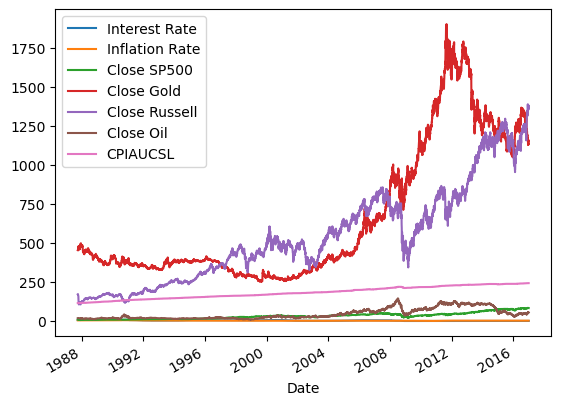

In [61]:
df_filtered_filled.plot.line(y=['Interest Rate', 'Inflation Rate', 'Close SP500', 'Close Gold', 'Close Russell', 'Close Oil', 'CPIAUCSL'] , x='Date')

<Axes: xlabel='Date'>

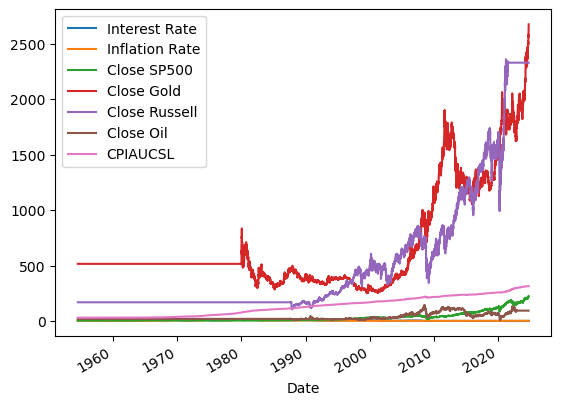

In [62]:
df_filled.plot.line(y=['Interest Rate', 'Inflation Rate', 'Close SP500', 'Close Gold', 'Close Russell', 'Close Oil', 'CPIAUCSL'] , x='Date')


<Axes: xlabel='Date'>

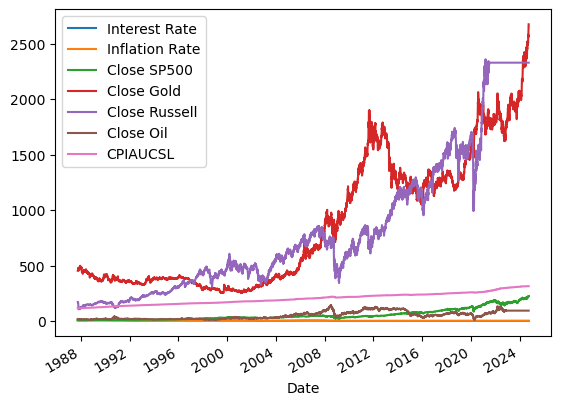

In [63]:
df_filtered_after1987_filled.plot.line(y=['Interest Rate', 'Inflation Rate', 'Close SP500', 'Close Gold', 'Close Russell', 'Close Oil', 'CPIAUCSL'] , x='Date')


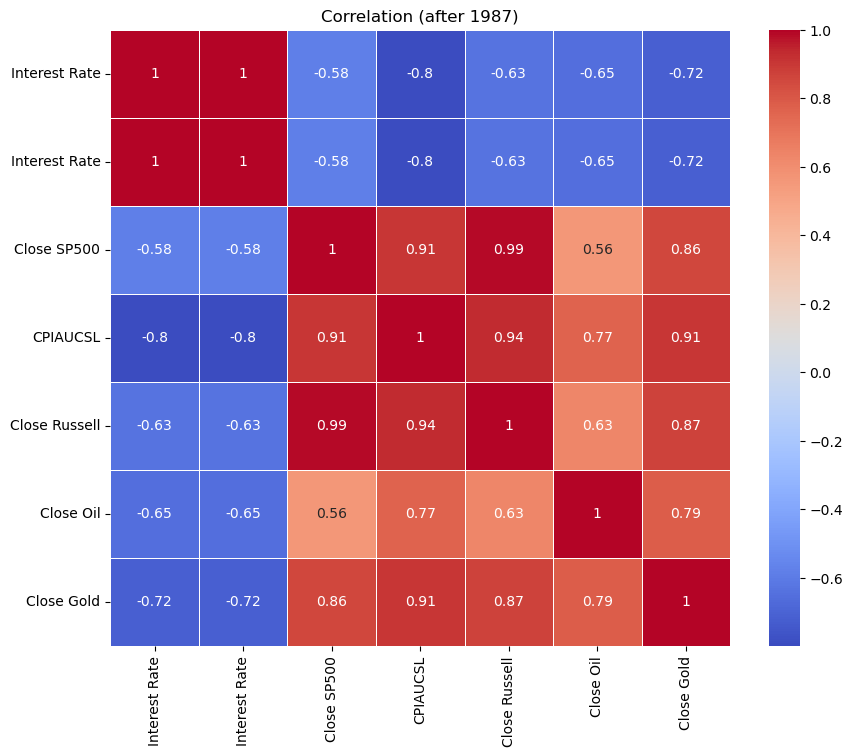

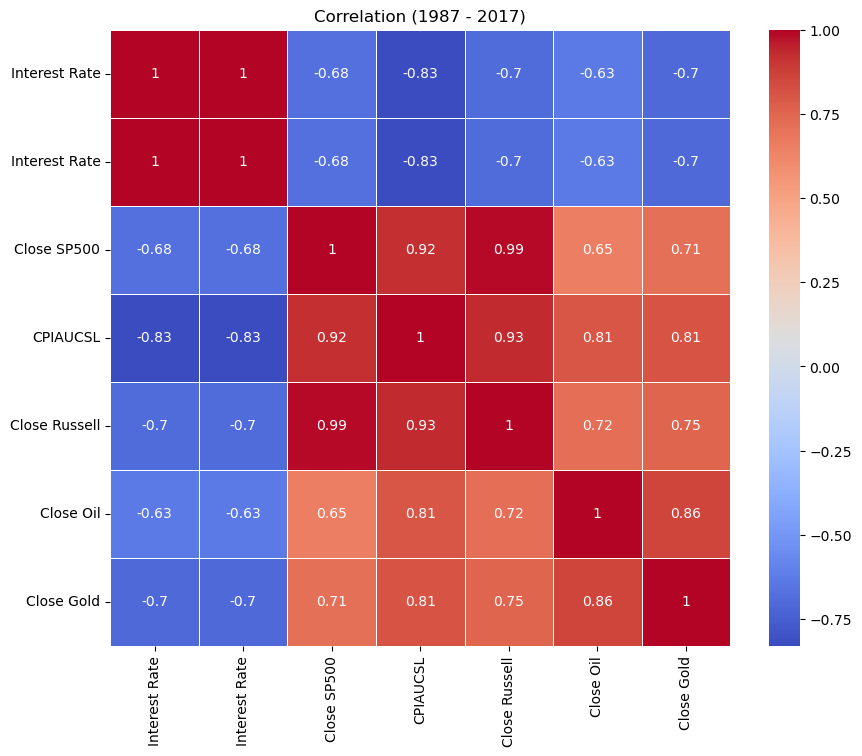

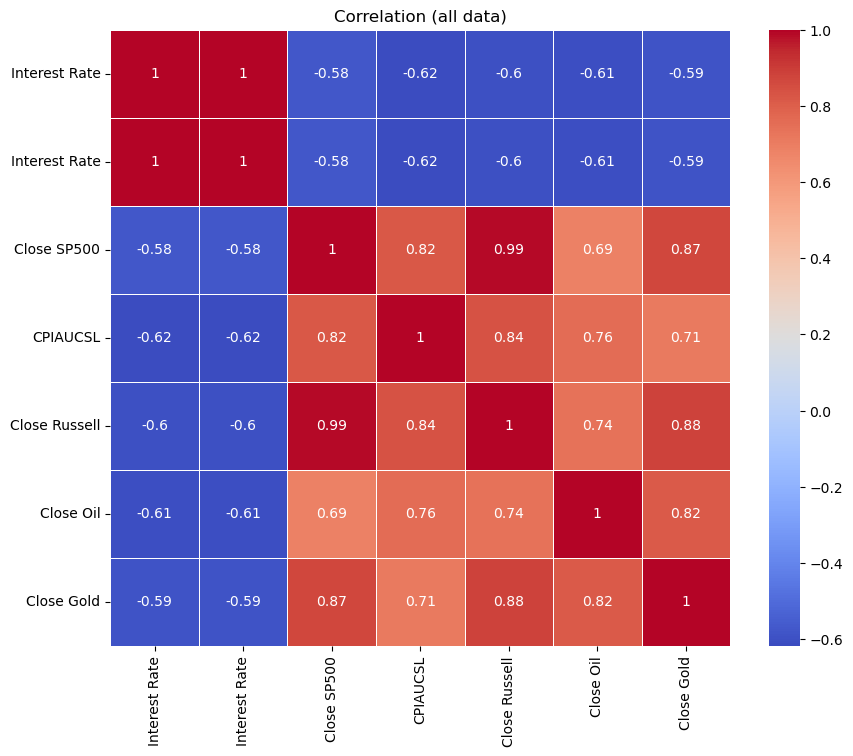

In [74]:
plt.figure(figsize=(10, 8))
corrmatt_after_1987 = df_filtered_after1987_filled[['Interest Rate', 'Interest Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].corr()
sns.heatmap(corrmatt_after_1987, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (after 1987)')
plt.show()

plt.figure(figsize=(10, 8))
corrmatt_after_1987_till_2017 = df_filtered_filled[['Interest Rate', 'Interest Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].corr()
sns.heatmap(corrmatt_after_1987_till_2017, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987 - 2017)')
plt.show()

plt.figure(figsize=(10, 8))
corrmatt_all_data = df_filled[['Interest Rate', 'Interest Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].corr()
sns.heatmap(corrmatt_all_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (all data)')
plt.show()